# Getting Started

## Prerequisites

### Importing Libraries

In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.signal import periodogram
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pickle

### Loading Data

In [2]:
os.chdir('..')
os.chdir('Data')
train_data= pd.read_csv('DailyDelhiClimateTrain.csv')
test_data= pd.read_csv('DailyDelhiClimateTest.csv')
os.chdir('..')
os.chdir('Notebooks')

## Problem Statement

*Forecast the mean temperature of New Delhi.*

# Data Preprocessing

## Checking NaN Values

### Train Data

In [3]:
train_data.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Test Data

In [4]:
test_data.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

## Checking Duplicated Rows

### Train Data

In [5]:
test_data.duplicated().sum()

0

### Test Data

In [6]:
test_data.duplicated().sum()

0

## Exploring Data Types

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


### Changing Data Type of Date

Change data type of 'date' from object to datetime.

In [8]:
train_data.date= pd.to_datetime(train_data.date)
test_data.date= pd.to_datetime(test_data.date)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


## Setting Date as Index

In [10]:
train_data.set_index('date', inplace= True)
test_data.set_index('date', inplace= True)

In [11]:
train_data= round(train_data, 3)
test_data= round(test_data, 3)

## Checking Descriptive Statistics

In [12]:
train_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495517,60.771705,6.802220,1011.104542
std,7.348100,16.769652,4.561614,180.231661
min,6.000000,13.429000,0.000000,-3.042000
25%,18.857000,50.375000,3.475000,1001.580000
50%,27.714000,62.625000,6.221500,1008.563500
75%,31.305500,72.218750,9.238250,1014.944750
max,38.714000,100.000000,42.220000,7679.333000


# Data Visualization

## Behaviour of Different Features Over Time

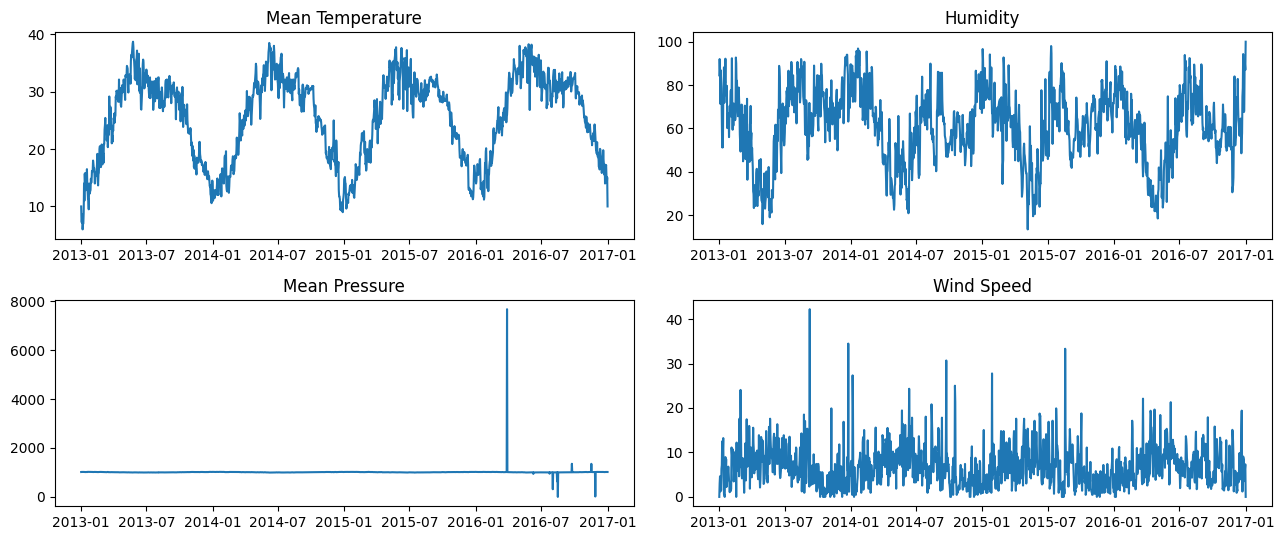

In [13]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(13, 5.5))

# Plotting the first subplot
plt.subplot(2, 2, 1)
plt.plot(train_data.meantemp)
plt.title('Mean Temperature')

# Plotting the second subplot
plt.subplot(2, 2, 2)
plt.plot(train_data.humidity)
plt.title('Humidity')

# Plotting the third subplot
plt.subplot(2, 2, 4)
plt.plot(train_data.wind_speed)
plt.title('Wind Speed')

# Plotting the fourth subplot
plt.subplot(2, 2, 3)
plt.plot(train_data.meanpressure)
plt.title('Mean Pressure')

plt.tight_layout()
plt.show()

## Pair Plot of Data

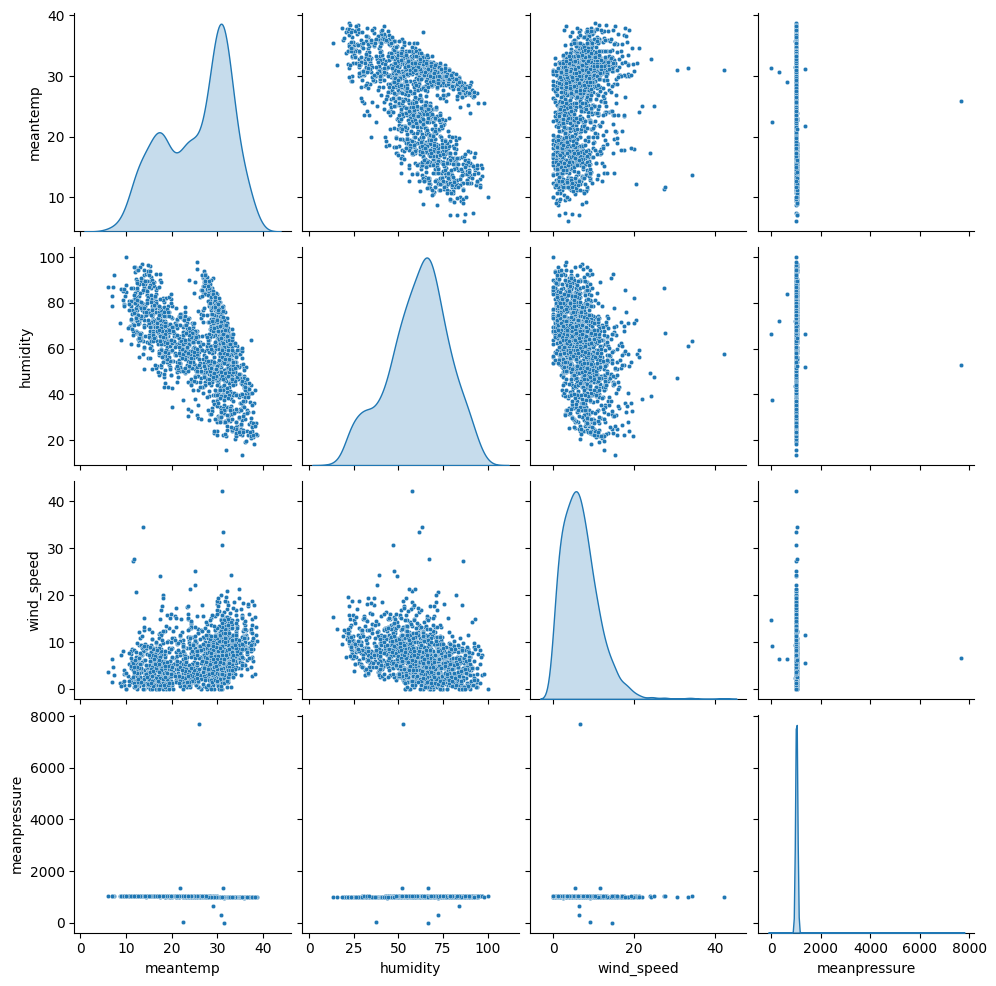

In [14]:
sns.pairplot(train_data, diag_kind= 'kde', plot_kws= {'s': 10})
plt.show()

## Auto-Correltation Function Plot

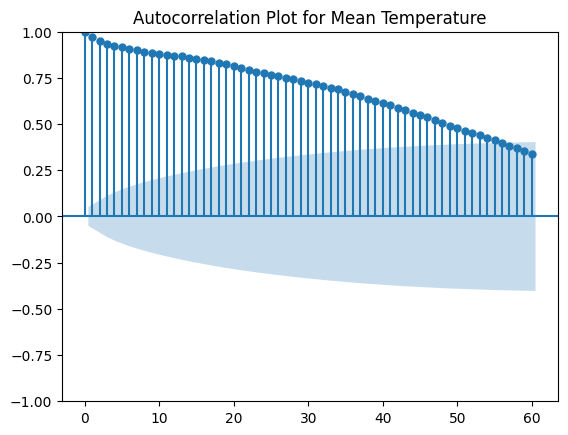

In [15]:
plot_acf(train_data.meantemp, lags=60)
plt.title('Autocorrelation Plot for Mean Temperature')
plt.show()

The auto regressive (AR) value is significant upto (t-55) lag.

## Partial Suto-Correlation Function Plot

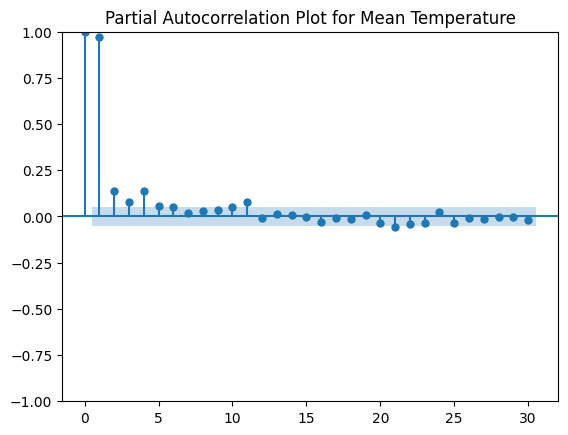

In [16]:
plot_pacf(train_data.meantemp, lags=30)
plt.title('Partial Autocorrelation Plot for Mean Temperature')
plt.show()

As there is a sharp fall in PACF after (t-1) lag, we can say that moving average (MA) value is significant upto MA(1).

## Decomposition of Data

<Figure size 1300x550 with 0 Axes>

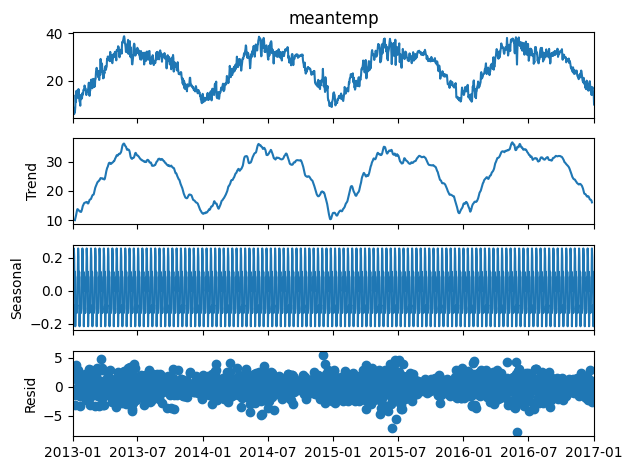

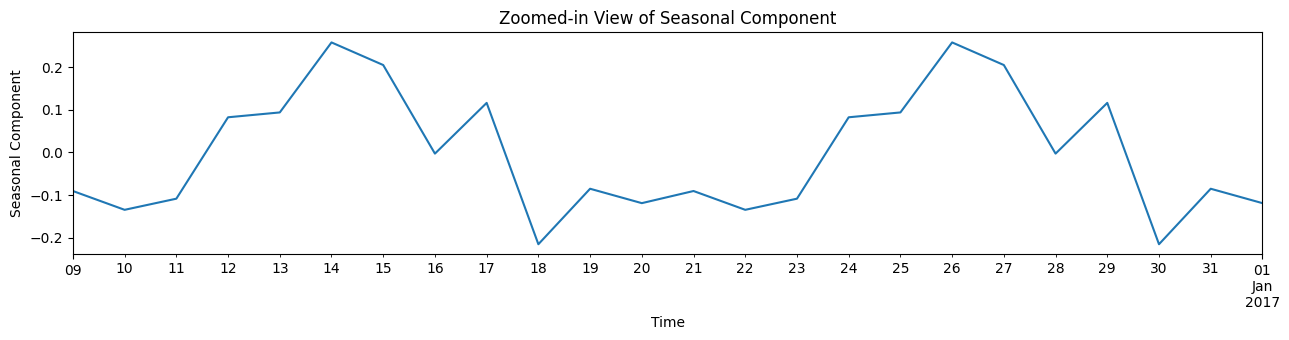

In [17]:
seasonal_period = 12

plt.figure(figsize=(13, 5.5))
decomposition = seasonal_decompose(train_data.meantemp, period=seasonal_period)
decomposition.plot()

# Zoom in on the seasonal component
plt.figure(figsize=(13, 3.5)) 
decomposition.seasonal[-seasonal_period * 2:].plot()
plt.title("Zoomed-in View of Seasonal Component")
plt.xlabel("Time")
plt.ylabel("Seasonal Component")
plt.tight_layout()
plt.show()

**Observations:**
- Trend and seasonality are playing role as the key components of the data.
- Residual has very less variance, in turn the white noise present in data is very less.
- The data has both seasons and cycles in the data pattern, hence should perform best with the models which take in seasonality as parameter.

## Performing Differencing on Data

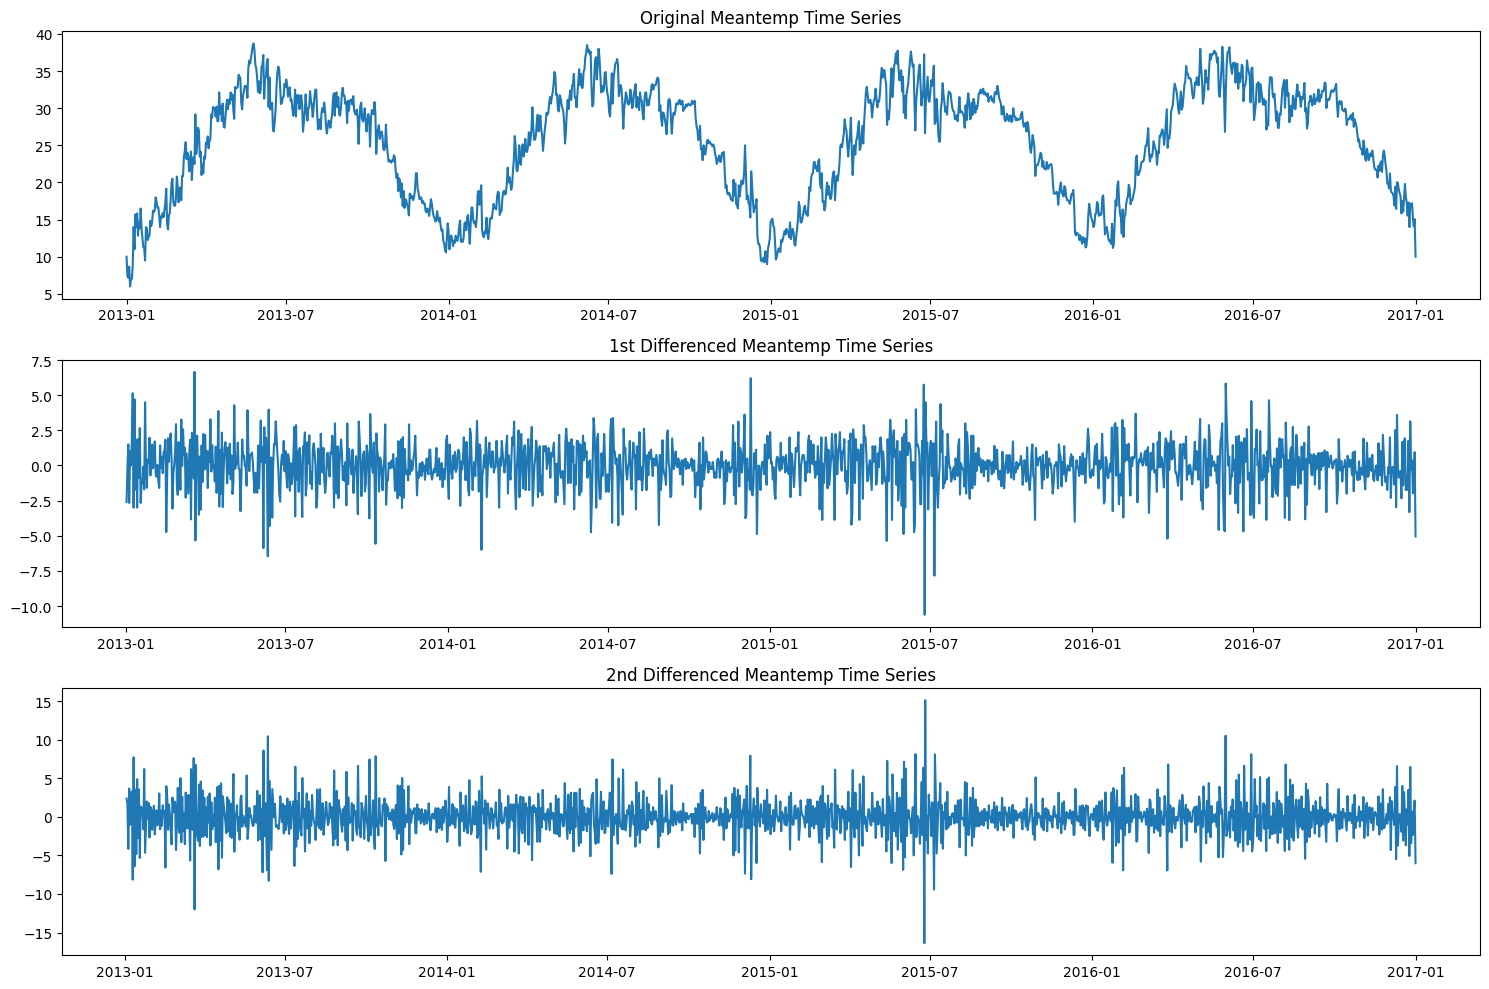

In [18]:
original_series = train_data.meantemp

# 1st Differencing
first_differenced_series = original_series.diff().dropna()

# 2nd Differencing
second_differenced_series = first_differenced_series.diff().dropna()

# Plotting the original, 1st differenced, and 2nd differenced series
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(original_series)
plt.title('Original Meantemp Time Series')

plt.subplot(3, 1, 2)
plt.plot(first_differenced_series)
plt.title('1st Differenced Meantemp Time Series')

plt.subplot(3, 1, 3)
plt.plot(second_differenced_series)
plt.title('2nd Differenced Meantemp Time Series')

plt.tight_layout()
plt.show()

**Observations:**
- The trend has been removed after performing 1st differencing, therefore, 2nd differencing may not be required while building the model.

# Feature Engineering

As the PACF relation at t-1 lag is significant, we can add meantemp(t-1) as a feature.

In [29]:
train_data['meantemp (t-1)'] = train_data.meantemp.shift(1)
test_data['meantemp (t-1)'] = test_data.meantemp.shift(1)

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [30]:
train_data.tail()

,meantemp,humidity,wind_speed,meanpressure,meantemp (t-1)
date,,,,,
2016-12-28,17.217,68.043,3.548,1015.565,16.850
2016-12-29,15.238,87.857,6.000,1016.905,17.217
2016-12-30,14.095,89.667,6.267,1017.905,15.238
2016-12-31,15.053,87.000,7.325,1016.100,14.095
2017-01-01,10.000,100.000,0.000,1016.000,15.053


In [32]:
test_data.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp (t-1)
date,,,,,
2017-01-02,18.500,77.222,2.894,1018.278,15.913
2017-01-03,17.111,81.889,4.017,1018.333,18.500
2017-01-04,18.700,70.050,4.545,1015.700,17.111
2017-01-05,18.389,74.944,3.300,1014.333,18.700
2017-01-06,19.318,79.318,8.682,1011.773,18.389


# Saving Data

In [33]:
def pickle_file(dataframe, file_name, folder_name='notebook_artifacts'):
    dir_path = os.path.join(folder_name, '')
    # Create the folder if it doesn't exist
    os.makedirs(dir_path, exist_ok=True)
    # Create the full file path
    full_path = os.path.join(dir_path, file_name)  

    with open(full_path, 'wb') as f:
        pickle.dump(dataframe, f)

In [34]:
pickle_file(train_data, 'train_data.pkl')
pickle_file(test_data, 'test_data.pkl')